In [1]:
import os
import pandas as pd

## Read data
df = pd.read_csv("train.csv")
print("Finished reading CSV file")
df = df.dropna()

## Basic Stats and Data Visualization
# import basic_stats
# basic_stats.print_basic_stats(df)
# basic_stats.print_unique_questions(df)

## Basic Feature Extraction
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    import basic_feature_extraction as basic_fe
    basic_fe.extract_features(df)

Finished reading CSV file


In [2]:
## Analyse Basic Features
# import analyse_basic_features as abf
# abf.analyse_basic_features(df)

## Preprocessing and Advanced Feature Extraction
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    import prep_advance_fe as pafe
    pafe.preprocess_advanced_feature_extraction(df)


Word Cloud for Duplicate Question pairs


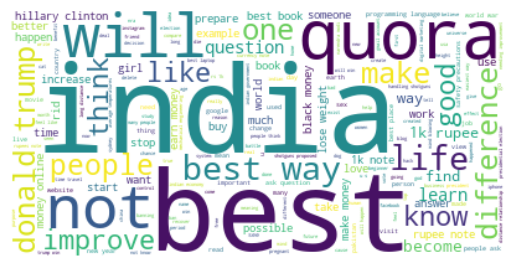

Word Cloud for Non-Duplicate Question pairs


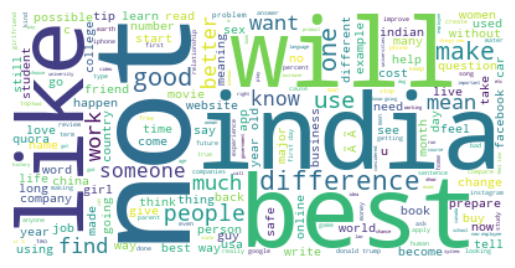

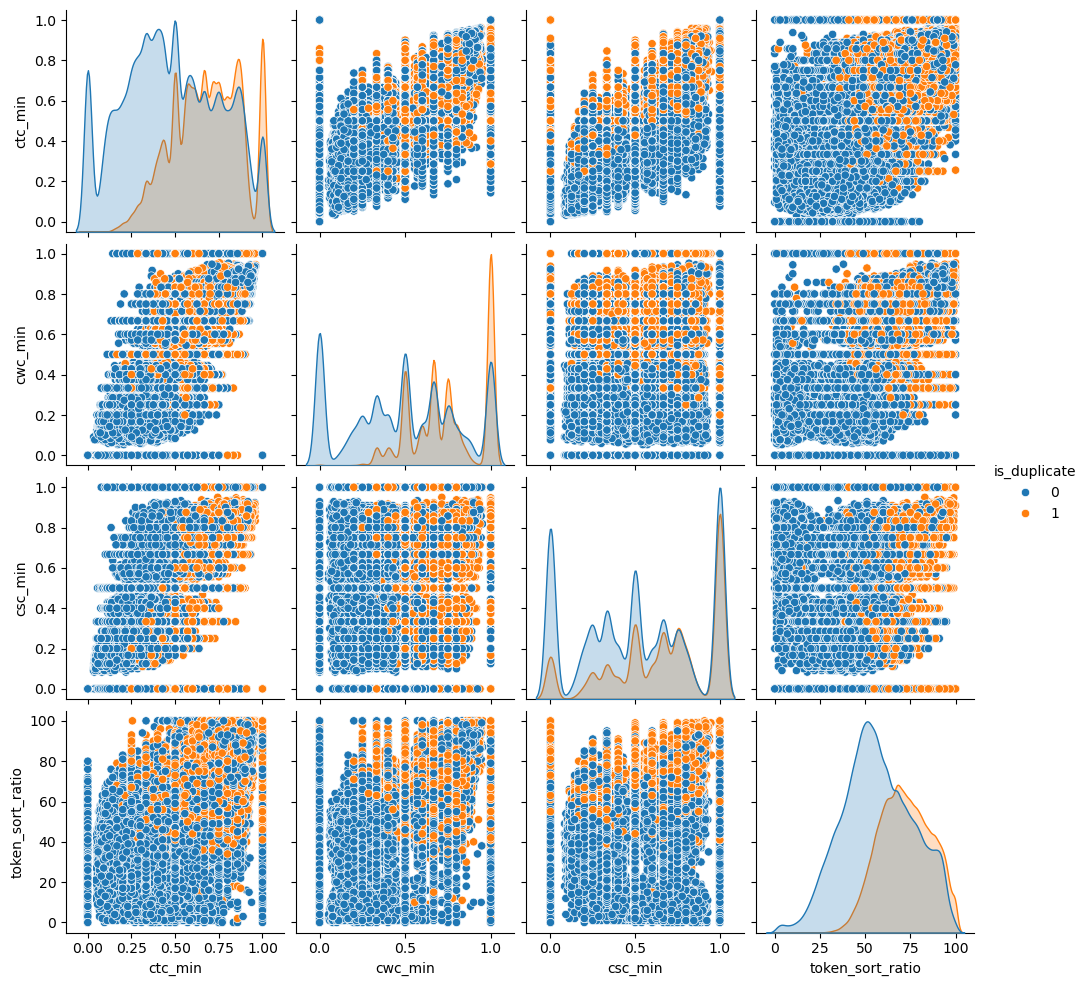

C:\Users\hp\Documents\ML and AI\Aman Projects\Quora QPP\analyse_advanced_features.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
C:\Users\hp\Documents\ML and AI\Aman Projects\Quora QPP\analyse_advanced_features.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

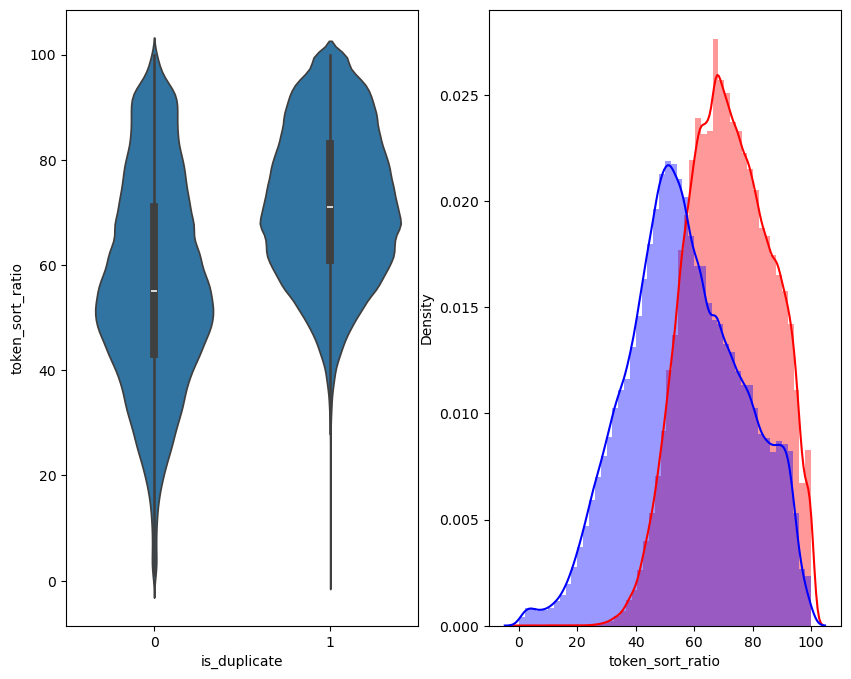

C:\Users\hp\Documents\ML and AI\Aman Projects\Quora QPP\analyse_advanced_features.py:66: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
C:\Users\hp\Documents\ML and AI\Aman Projects\Quora QPP\analyse_advanced_features.py:67: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

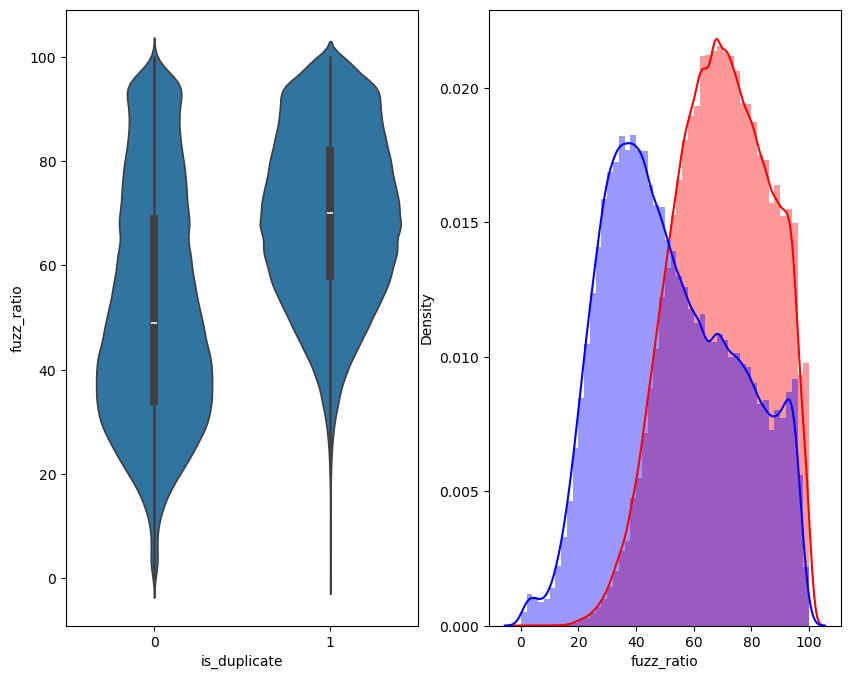

In [3]:
## Analyse Advanced Features
# import analyse_advanced_features as aaf
# aaf.analyse_af(df)

In [4]:
## Q_mean W2V
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

# merge text of questions
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False)
tfidf.fit_transform(questions)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8180522 stored elements and shape (808574, 87651)>

In [21]:
# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

# After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
# here we use a pre-trained GLOVE model which comes free with "Spacy". https://spacy.io/usage/vectors-similarity
# It is trained on Wikipedia and therefore, it is stronger in terms of word semantics.

#pip install spacy
import spacy
import numpy as np

# en_vectors_web_lg, which includes over 1 million unique vectors.
# python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

vecs1 = []         #2HRS_7MINS
from tqdm import tqdm

# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['question1'])):
    # This should be handled during data cleaning
    # if type(qu1) is float:
    #     # print(qu1)
    #     qu1=''

    # print(qu1)
    doc1 = nlp(qu1) #type conersion str to 'spacy.tokens.doc.Doc'

    # 384 is the number of dimensions of vectors 
    # Changed to 96. Think, change in dimension of vector coz of changed version of spacy
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector  # Giving 1*96 array instead of 1*384 
        # fetch df score
        # print(word1)
        # print(vec1)
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # print(idf)
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    # print(mean_vec1)
    vecs1.append(mean_vec1)
    # print(vecs1)
df['q1_feats_m'] = list(vecs1)

100%|████████████████████████████████████████████████████████████████████████| 404287/404287 [3:12:40<00:00, 34.97it/s]


In [ ]:
vecs2 = []    #3HRS 14MINS
for qu2 in tqdm(list(df['question2'])):
    if type(qu2) is float:
        qu2=''
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

IOPub message rate exceeded.███████████████████▏                             | 237013/404287 [2:09:09<50:43, 54.95it/s]
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|████████████████████████████████████████████████████████████████████████| 404287/404287 [3:01:16<00:00, 37.17it/s]


In [23]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 28
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 96
Number of features in question2 w2v  dataframe : 96
Number of features in final dataframe  : 232


In [24]:
# storing the final features to csv file
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1  = df1.merge(df2, on='id',how='left')
    df2  = df3_q1.merge(df3_q2, on='id',how='left')
    result  = df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

In [ ]:
## ML Model
# Run ml_model.ipnb